## Read and Clean Data

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

df = pd.read_csv("immovlan_cleaned_file.csv")
df
df.columns

Index(['url', 'Property ID', 'Price', 'State of the property', 'Availability',
       'Number of bedrooms', 'Livable surface', 'Furnished', 'Attic', 'Garage',
       'Number of garages', 'Kitchen equipment', 'Kitchen type',
       'Number of bathrooms', 'Number of showers', 'Number of toilets',
       'Type of heating', 'Type of glazing', 'Elevator', 'Number of facades',
       'Garden', 'Surface garden', 'Terrace', 'Surface terrace',
       'Total land surface', 'Swimming pool', 'type', 'postal_code', 'city',
       'Region', 'province', 'price_per_sqm', 'Price_per_sqm_land'],
      dtype='object')

In [210]:
df.type.unique()

array(['studio', 'apartment', 'residence', 'investment property',
       'commercial building', 'land', 'villa', 'ground floor',
       'industrial building', 'garage', 'loft', 'penthouse',
       'development site', 'mixed building', 'undetermined property',
       'office space', 'triplex', 'parking', 'master house',
       'business surface', 'duplex', 'to parcel out site', 'student flat',
       'chalet', 'farming site', 'farmland', 'cottage', 'bungalow',
       'mansion', 'industrial ground', 'wood', 'green zone', 'other',
       'recreational land'], dtype=object)

In [211]:
# drop less impactful columns 
# Dropped 'price_per_sqm' else it will result in data leakage, because it gives information away about the price indirectly

df1 = df.drop(['url','Property ID','State of the property', 'Availability','Livable surface', 'Furnished', 'Attic','Number of garages','Kitchen equipment', 'Kitchen type','Number of showers','Type of heating', 'Type of glazing','Number of facades','Surface garden', 'Terrace', 'Surface terrace',
       'Total land surface','city','price_per_sqm',
       'province','Price_per_sqm_land'], axis='columns')
df1

,Price,Number of bedrooms,Garage,Number of bathrooms,Number of toilets,Elevator,Garden,Swimming pool,type,postal_code,Region
0,175000.0,0.0,NaN,1.0,1.0,NaN,0.0,NaN,studio,4000,Wallonia
1,415000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,apartment,1410,Wallonia
2,399000.0,2.0,1.0,1.0,1.0,NaN,1.0,NaN,residence,1501,Flanders
3,229000.0,2.0,NaN,NaN,NaN,1.0,0.0,NaN,apartment,7000,Wallonia
4,320000.0,3.0,NaN,NaN,1.0,NaN,1.0,NaN,apartment,7000,Wallonia
...,...,...,...,...,...,...,...,...,...,...,...
16304,995000.0,6.0,1.0,2.0,NaN,NaN,1.0,1.0,villa,1440,Wallonia
16305,645000.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,investment property,2530,Flanders
16306,649000.0,5.0,NaN,NaN,NaN,0.0,NaN,NaN,investment property,8600,Flanders
16307,239000.0,2.0,1.0,1.0,1.0,1.0,0.0,NaN,apartment,2630,Flanders


In [212]:
# cleaning Nan values 

df1.isnull().sum()

# df1.isnull().mean() * 100


Price                    584
Number of bedrooms      2226
Garage                  9265
Number of bathrooms     4267
Number of toilets       6295
Elevator                5486
Garden                  3523
Swimming pool          12389
type                       0
postal_code                0
Region                     0
dtype: int64

In [213]:
# Since only 3.5% of the 'price' values are missing, it's safe to drop those rows.

df1.dropna(subset=['Price'], inplace=True)
df1.isnull().sum()


Price                      0
Number of bedrooms      2170
Garage                  8898
Number of bathrooms     4051
Number of toilets       5963
Elevator                5226
Garden                  3290
Swimming pool          11968
type                       0
postal_code                0
Region                     0
dtype: int64

In [214]:
# check unique values of Nos of toilets and Nos of bathrooms 

df1['Number of toilets'].value_counts()
# df1['Number of bathrooms'].value_counts()
# df1['Number of bedrooms'].value_counts()




Number of toilets
1.0     5021
2.0     3646
3.0      689
4.0      208
5.0       83
6.0       53
7.0       16
8.0       12
10.0      10
9.0        7
12.0       4
17.0       4
15.0       3
16.0       2
50.0       1
11.0       1
23.0       1
14.0       1
Name: count, dtype: int64

In [215]:
# Drop rows have more than 20 bedrooms, bathrooms and toilets

df1.drop(
    df1[
        (df1["Number of bedrooms"] > 20) |
        (df1["Number of bathrooms"] > 20) |
        (df1["Number of toilets"] > 20)
    ].index,
    inplace=True
)
df1.isnull().sum()

Price                      0
Number of bedrooms      2170
Garage                  8891
Number of bathrooms     4047
Number of toilets       5960
Elevator                5223
Garden                  3287
Swimming pool          11961
type                       0
postal_code                0
Region                     0
dtype: int64

In [216]:
df1.columns

Index(['Price', 'Number of bedrooms', 'Garage', 'Number of bathrooms',
       'Number of toilets', 'Elevator', 'Garden', 'Swimming pool', 'type',
       'postal_code', 'Region'],
      dtype='object')

## Split Dataset

Train / Validation / Test Split – <br>
Training set: Like practice problems → used to fit the model.<br>
Validation set: Like a mock test → used to tune hyperparameters and monitor overfitting.<br>
Test set: Like the final exam → never seen by the model; provides an unbiased evaluation of real-world performance.<br>

Doing this before preprocessing helps to avoid data leakage

In [217]:
# Split the data into training, testing and  validation 

X = df1.drop('Price', axis=1)  # Features
y = df1['Price']               # Target

# Step 1: Split into training+validation and test (e.g., 80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split training+validation into training and validation (e.g., 75% train, 25% val of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Now:
# Training: 60% of original data
# Validation: 20%
# Test: 20%



In [218]:
# Split function 

def split_60_20_20(df1, target, random_state=42):
    """
    Splits the dataset into:
    - 60% training
    - 20% validation
    - 20% testing
    """

    # Separate features and label
    X = df1.drop(target, axis=1)
    y = df1[target]

    # --- STEP 1: Train+Val vs Test (80% / 20%) ---
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.20, random_state=random_state
    )

    # --- STEP 2: Train vs Val (75% / 25% of the 80%) ---
    # Because:
    # 75% of 80% = 0.75 * 0.80 = 0.60 → 60%
    # 25% of 80% = 0.25 * 0.80 = 0.20 → 20%
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=0.25, random_state=random_state
    )

    return X_train, X_val, X_test, y_train, y_val, y_test


## Preprocessing<br>

1. Imputation -  <br>
   These columns are numeric (Number of bedrooms, Number of bathrooms, Number of toilets), the best approach is Median imputation.<br>
   Median gives the central tendency without being affected by outliers.<br>
   
   1.a Rescaling numeric features: Standardization  <br> 

2. one-hot encoding - <br>
   Converting categorical data into numeric features <br>

3. KNN to fill in binary columns lower missing values  <br> 

4. Imputing with zero in binary columns higher missing values <br>

   


In [219]:
# 1. Imputation for numeric columns 

numeric_cols = ['Number of bedrooms','Number of bathrooms','Number of toilets','price_per_sqm']

from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='median')

# Fit only on training data
X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])

# Transform val and test
X_val[numeric_cols] = numeric_imputer.transform(X_val[numeric_cols])
X_test[numeric_cols] = numeric_imputer.transform(X_test[numeric_cols])


# Check missing values 

X_train[numeric_cols].isnull().sum() 
X_val[numeric_cols].isnull().sum()
X_test[numeric_cols].isnull().sum()



KeyError: "['price_per_sqm'] not in index"

In [ ]:
# Imputation function 
from sklearn.impute import SimpleImputer

def impute_numeric(X_train, X_val, X_test, numeric_cols):

    imputer = SimpleImputer(strategy='median')

    X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
    X_val[numeric_cols]   = imputer.transform(X_val[numeric_cols])
    X_test[numeric_cols]  = imputer.transform(X_test[numeric_cols])

    return X_train, X_val, X_test, imputer


In [ ]:
# test 

# Impute numeric missing values
X_train, X_val, X_test = impute_numeric(X_train, X_val, X_test, numeric_cols)
X_train


,Number of bedrooms,Garage,Number of bathrooms,Number of toilets,Elevator,Garden,Swimming pool,postal_code,price_per_sqm
7689,2.0,1.0,1.0,1.0,1.0,1.0,0.0,9080,4328.358209
12596,2.0,NaN,1.0,4.0,0.0,NaN,NaN,7810,2944.444444
12814,2.0,NaN,2.0,1.0,NaN,1.0,NaN,1300,4285.714286
4901,5.0,1.0,2.0,1.0,NaN,1.0,NaN,1000,7189.542484
9067,3.0,NaN,1.0,1.0,NaN,NaN,NaN,6032,2944.444444
...,...,...,...,...,...,...,...,...,...
578,3.0,NaN,1.0,1.0,NaN,NaN,NaN,4280,2944.444444
7211,0.0,NaN,1.0,1.0,NaN,0.0,NaN,1180,5000.000000
10036,2.0,1.0,1.0,3.0,1.0,0.0,NaN,4780,2237.762238
5994,3.0,NaN,1.0,1.0,NaN,NaN,NaN,3590,2944.444444


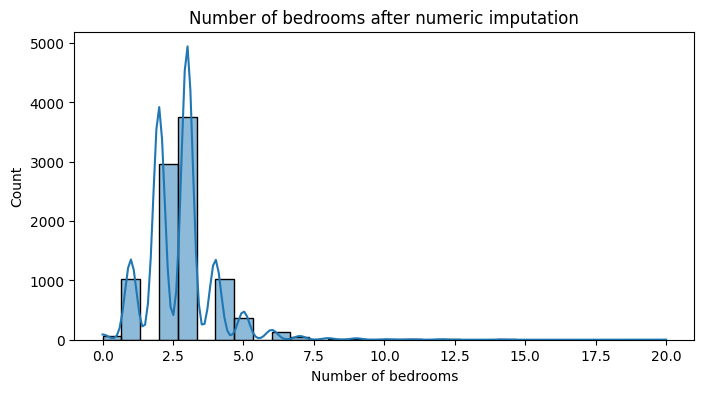

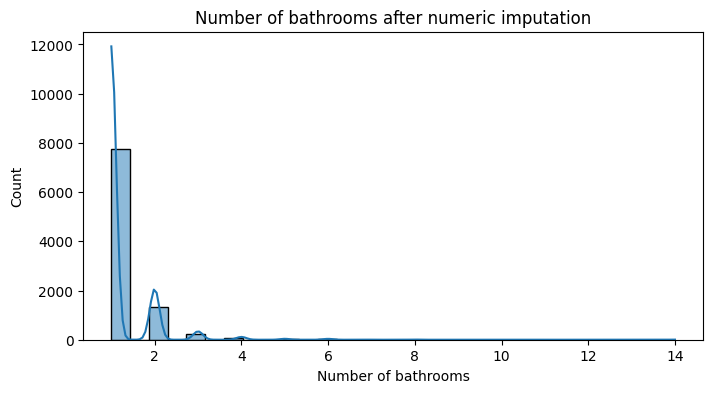

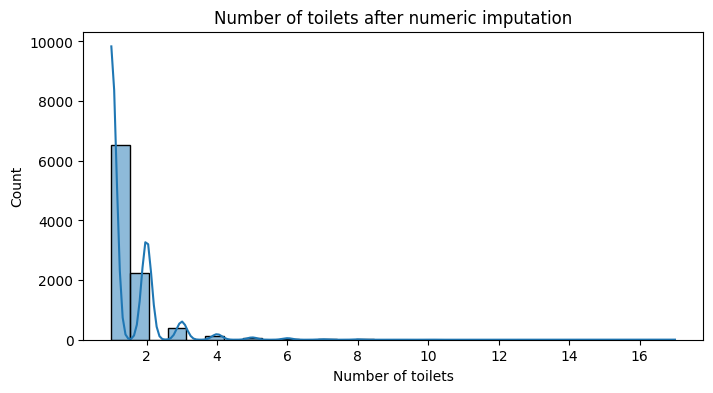

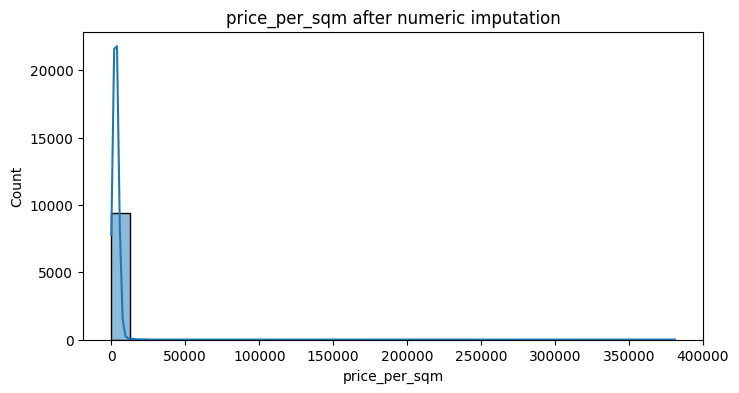

In [ ]:
# Visual check 

import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'{col} after numeric imputation')
    plt.show()


| Data type           | Outlier tool  |
| ------------------- | ------------- |
| Very bent shape     | log transform |
| Slightly bent shape | quantile cut  |
| Straight shape      | z-score       |


In [ ]:
# Outlier handling (automatic)
#  3A — Skewness detection
def analyze_skewness(df, cols):
    skew_report = {}
    for col in cols:
        s = df[col].skew()
        if abs(s) > 1:
            skew_report[col] = "log_sigma"
        elif abs(s) > 0.5:
            skew_report[col] = "quantile"
        else:
            skew_report[col] = "zscore"
    return skew_report

# 3B - Capping methods 
def log_sigma_cap(s):
    log_s = np.log1p(s)
    mean, std = log_s.mean(), log_s.std()
    lower = mean - 3 * std
    upper = mean + 3 * std
    return np.expm1(np.clip(log_s, lower, upper))

def quantile_cap(s, low_q=0.01, high_q=0.99):
    return s.clip(s.quantile(low_q), s.quantile(high_q))

def zscore_cap(s, z=3):
    mean, std = s.mean(), s.std()
    lower = mean - z * std
    upper = mean + z * std
    return s.clip(lower, upper)

# 3C Main outlier handler 
def handle_outliers(X_train, X_val, X_test, numeric_cols):
    # Analyze skewness on training data to decide method for each column
    skewness = analyze_skewness(X_train, numeric_cols)

    for col, method in skewness.items():
        if method == "log_sigma":
            X_train[col] = log_sigma_cap(X_train[col])
            X_val[col]   = log_sigma_cap(X_val[col])
            X_test[col]  = log_sigma_cap(X_test[col])

        elif method == "quantile":
            X_train[col] = quantile_cap(X_train[col])
            X_val[col]   = quantile_cap(X_val[col])
            X_test[col]  = quantile_cap(X_test[col])

        else:  # zscore
            X_train[col] = zscore_cap(X_train[col])
            X_val[col]   = zscore_cap(X_val[col])
            X_test[col]  = zscore_cap(X_test[col])

    return X_train, X_val, X_test




In [ ]:
# test
numeric_cols = ['Number of bedrooms', 'Number of bathrooms', 'Number of toilets', 'price_per_sqm']


X_train, X_val, X_test = handle_outliers(X_train, X_val, X_test, numeric_cols)
print("=== Training data stats after outlier handling ===")
print(X_train[numeric_cols].describe())

=== Training data stats after outlier handling ===
       Number of bedrooms  Number of bathrooms  Number of toilets  \
count         9429.000000          9429.000000        9429.000000   
mean             2.729241             1.219575           1.401118   
std              1.169751             0.502316           0.696058   
min              0.357198             1.000000           1.000000   
25%              2.000000             1.000000           1.000000   
50%              3.000000             1.000000           1.000000   
75%              3.000000             1.000000           2.000000   
max              8.304199             3.121306           4.096872   

       price_per_sqm  
count    9429.000000  
mean     2996.672295  
std      1220.451168  
min       670.918023  
25%      2356.223176  
50%      2944.444444  
75%      3431.297710  
max     11385.535135  


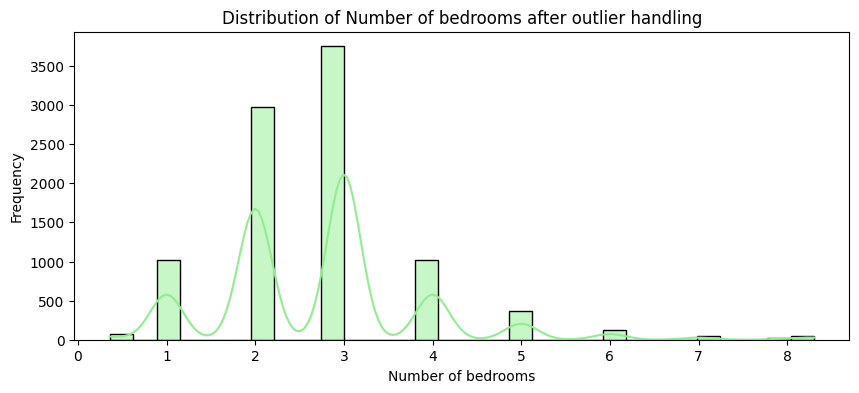

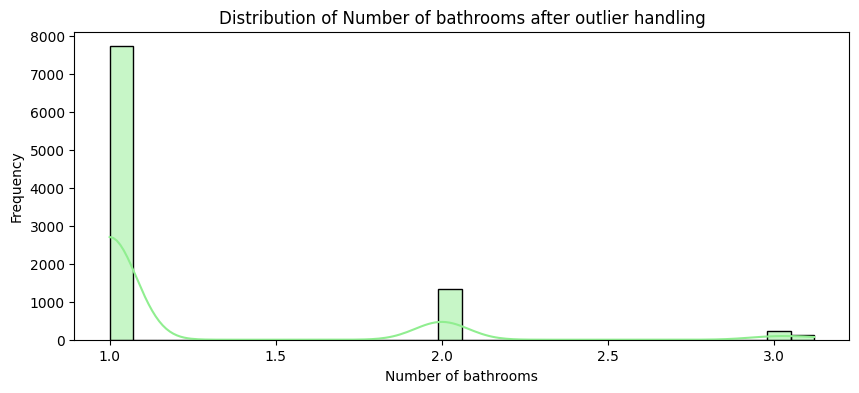

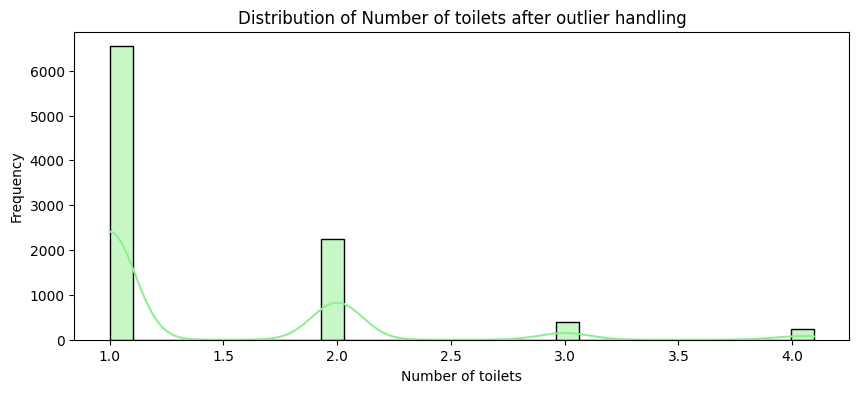

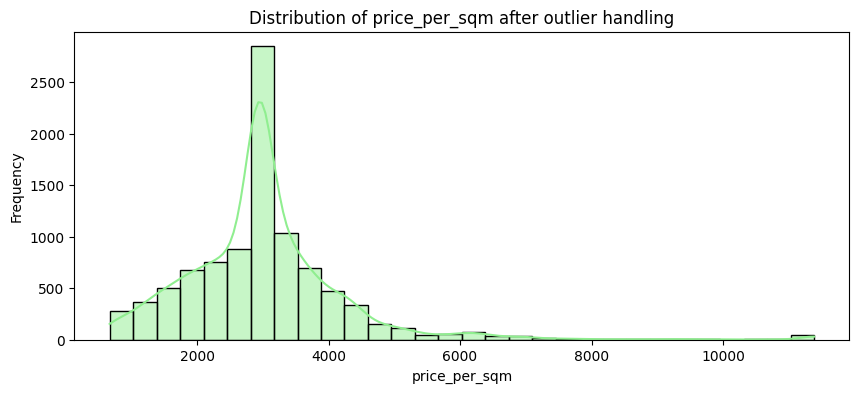

In [ ]:
# Visual check
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(X_train[col], kde=True, bins=30, color='lightgreen')
    plt.title(f'Distribution of {col} after outlier handling')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
# 1.a Scaling - Standardization for numeric columns to have mean=0 and std=1

from sklearn.preprocessing import StandardScaler

def scale_numeric(X_train, X_val, X_test, numeric_cols):
  
    scaler = StandardScaler()

    # Fit only on training data
    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

    # Transform validation and test sets
    X_val[numeric_cols]   = scaler.transform(X_val[numeric_cols])
    X_test[numeric_cols]  = scaler.transform(X_test[numeric_cols])

    return X_train, X_val, X_test, scaler


# note: 4.521430e-18 means e-18 part is the exponent, meaning “times 10 to the power of -18.”

In [ ]:
# test
X_train, X_val, X_test, scaler = scale_numeric(X_train, X_val, X_test, numeric_cols)

print("=== Training data stats after scaling ===")
print(X_train[numeric_cols].describe())

# Optional: check means and std separately
print("\nColumn means (should be ~0):")
print(X_train[numeric_cols].mean())
print("\nColumn standard deviations (should be ~1):")
print(X_train[numeric_cols].std())



=== Training data stats after scaling ===
       Number of bedrooms  Number of bathrooms  Number of toilets  \
count        9.429000e+03         9.429000e+03       9.429000e+03   
mean        -8.440003e-17         4.370716e-17       1.092679e-16   
std          1.000053e+00         1.000053e+00       1.000053e+00   
min         -2.027927e+00        -4.371490e-01      -5.763012e-01   
25%         -6.234486e-01        -4.371490e-01      -5.763012e-01   
50%          2.314795e-01        -4.371490e-01      -5.763012e-01   
75%          2.314795e-01        -4.371490e-01       8.604366e-01   
max          4.766189e+00         3.786124e+00       3.873092e+00   

       price_per_sqm  
count   9.429000e+03  
mean    1.910304e-16  
std     1.000053e+00  
min    -1.905752e+00  
25%    -5.247921e-01  
50%    -4.279616e-02  
75%     3.561375e-01  
max     6.873940e+00  

Column means (should be ~0):
Number of bedrooms    -8.440003e-17
Number of bathrooms    4.370716e-17
Number of toilets      1.09

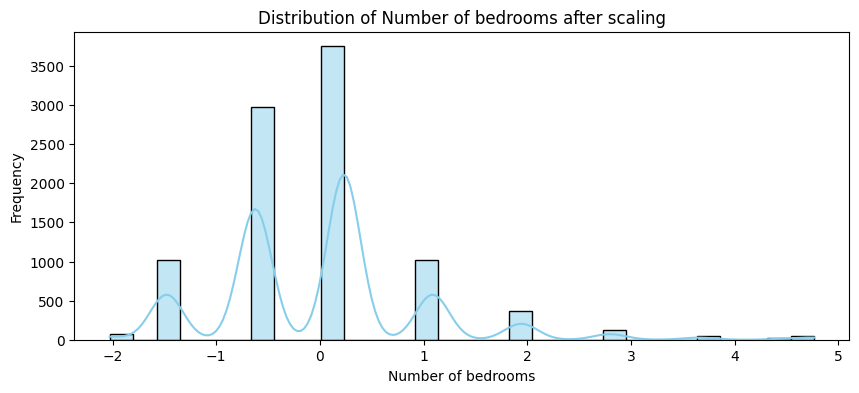

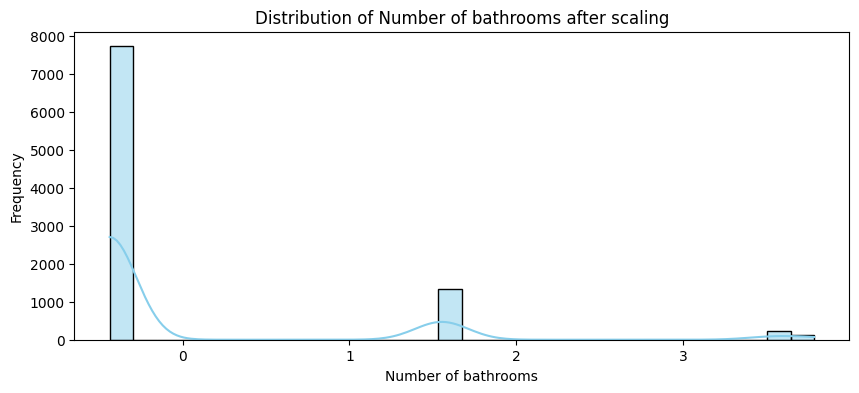

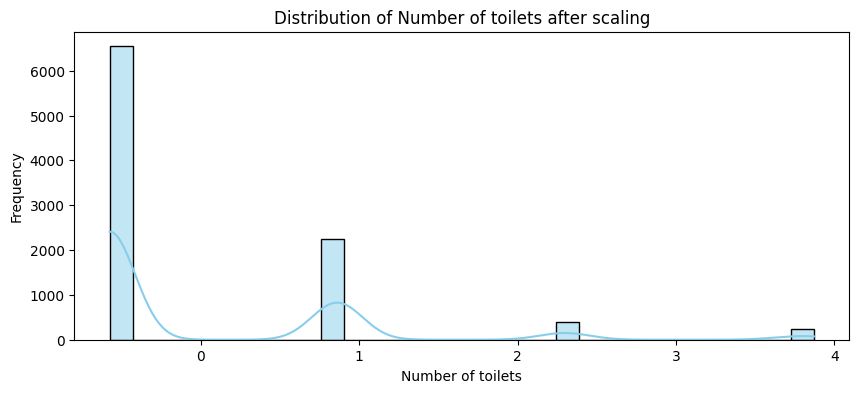

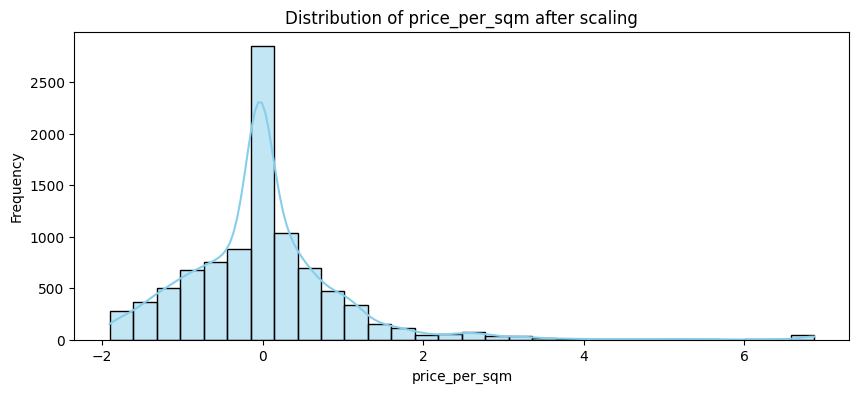

In [ ]:
# Visual check 
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(X_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col} after scaling')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



In [ ]:
def preprocess(df, target, numeric_cols):
    # 1. Split
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, target)

    # 2. Impute
    X_train, X_val, X_test, imputer = impute_numeric(X_train, X_val, X_test, numeric_cols)

    # 3. Outliers
    X_train, X_val, X_test = handle_outliers(X_train, X_val, X_test, numeric_cols)

    # 4. Scale
    X_train, X_val, X_test, scaler = scale_numeric(X_train, X_val, X_test, numeric_cols)

    return X_train, X_val, X_test, y_train, y_val, y_test, imputer, scaler


In [ ]:
#  3 . KNN (k-Nearest Neighbors) - for binary columns {Elevator and garden}
# KNNImputer relies on finding “nearest neighbors” to fill missing values.
# Columns with low to moderate missingness, like garden (21%) or Elevator (33%), are much safer for KNN imputation.

from sklearn.impute import KNNImputer

def knn_impute_binary(X_train, X_val, X_test, binary_cols, n_neighbors=5):
   
    
    # Initialize KNN imputer
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    
    # Fit on training data and transform
    X_train[binary_cols] = knn_imputer.fit_transform(X_train[binary_cols])
    
    # Transform validation and test sets
    X_val[binary_cols]   = knn_imputer.transform(X_val[binary_cols])
    X_test[binary_cols]  = knn_imputer.transform(X_test[binary_cols])
    
    # Round to ensure strictly 0.0 / 1.0 floats
    # this step necessary because the column could have decimal values between 0 and 1, not exactly 0.0 or 1.0
    for col in binary_cols:
        X_train[col] = X_train[col].round()
        X_val[col]   = X_val[col].round()
        X_test[col]  = X_test[col].round()
    
    return X_train, X_val, X_test, knn_imputer


In [ ]:
binary_cols = ['Elevator', 'Garden']

X_train, X_val, X_test = knn_impute_binary(X_train, X_val, X_test, binary_cols, n_neighbors=5)
X_train

,Number of bedrooms,Garage,Number of bathrooms,Number of toilets,Elevator,Garden,Swimming pool,postal_code,price_per_sqm
7689,2.0,1.0,1.0,1.0,1.0,1.0,0.0,9080,4328.358209
12596,2.0,0.0,1.0,4.0,0.0,1.0,0.0,7810,2944.444444
12814,2.0,0.0,2.0,1.0,1.0,1.0,0.0,1300,4285.714286
4901,5.0,1.0,2.0,1.0,1.0,1.0,0.0,1000,7189.542484
9067,3.0,0.0,1.0,1.0,0.0,1.0,0.0,6032,2944.444444
...,...,...,...,...,...,...,...,...,...
578,3.0,0.0,1.0,1.0,0.0,1.0,0.0,4280,2944.444444
7211,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1180,5000.000000
10036,2.0,1.0,1.0,3.0,1.0,0.0,0.0,4780,2237.762238
5994,3.0,0.0,1.0,1.0,0.0,1.0,0.0,3590,2944.444444


In [ ]:
# 4. Imputing with 0 
# Very high missing values 
#  Interpretation : garage = 0 → no garage; swimming pool = 0 → no swimming pool.

def impute_zero(X_train, X_val, X_test, binary_cols):
    """
    Impute missing values with 0 for binary columns.
    """
    for col in binary_cols:
        if col in X_train.columns:
            X_train[col] = X_train[col].fillna(0)
            X_val[col] = X_val[col].fillna(0)
            X_test[col] = X_test[col].fillna(0)
    
    return X_train, X_val, X_test


In [ ]:
# test 



In [ ]:
# Target encoding for categorical columns (type and Region)
# Replace with mean price per type and Region 
# fit()       = CREATE the dictionary (learn the rules)
# transform() = USE the dictionary (apply the rules)

from sklearn.preprocessing import TargetEncoder

def target_encode(X_train, X_val, X_test, y_train, categorical_cols):
  
    enc = TargetEncoder(smooth="auto", target_type="continuous")
    
    # Fit on training data only
    enc.fit(X_train[categorical_cols], y_train)
    
    # Transform and replace columns
    X_train[categorical_cols] = enc.transform(X_train[categorical_cols])
    X_val[categorical_cols] = enc.transform(X_val[categorical_cols])
    X_test[categorical_cols] = enc.transform(X_test[categorical_cols])
    
    return X_train, X_val, X_test, enc

In [ ]:
# test encoding

CATEGORICAL_COLS = ['type', 'Region']
X_train, X_val, X_test, target_encoder = target_encode(
    X_train, X_val, X_test, y_train, CATEGORICAL_COLS
)

print(X_train[['type', 'Region']].head(10)) 

                type         Region
7689   335507.882849  406088.994613
12596  315072.594828  321092.532585
12814  335507.882849  321092.532585
4901   730786.873337  538358.109841
9067   202367.173997  321092.532585
14916  335507.882849  321092.532585
11757   65389.565918  321092.532585
14804  335507.882849  321092.532585
14901  335507.882849  406088.994613
8221   403708.185266  321092.532585


## Linear Regression Model 

In [ ]:
def preprocess(df1, target, numeric_cols, categorical_cols=[], binary_cols_knn=[], binary_cols_zero=[]):
    """
    Full preprocessing function.
    Returns all fitted objects needed for predictions.
    """
    
    # 1. Split
    X_train, X_val, X_test, y_train, y_val, y_test = split_60_20_20(df1, target, random_state=42)
    
    # 2. Target encoding
    target_encoder = None                 #Variable name
    if categorical_cols:
        X_train, X_val, X_test, target_encoder = target_encode(X_train, X_val, X_test, y_train, categorical_cols)
    
    # 3. Numeric imputation
    X_train, X_val, X_test, numeric_imputer = impute_numeric(X_train, X_val, X_test, numeric_cols)
    
    # 4. Outlier handling (no object to save — uses statistics calculated on the fly)
    X_train, X_val, X_test = handle_outliers(X_train, X_val, X_test, numeric_cols)
    
    # 5. Scaling
    X_train, X_val, X_test, scaler = scale_numeric(X_train, X_val, X_test, numeric_cols)
    
    # 6. KNN imputation for binary columns
    knn_imputer = None  
    if binary_cols_knn:
        X_train, X_val, X_test, knn_imputer = knn_impute_binary(X_train, X_val, X_test, binary_cols_knn)
    
    # 7. Impute with 0 (no object needed — always just fills with 0)
    if binary_cols_zero:
        X_train, X_val, X_test = impute_zero(X_train, X_val, X_test, binary_cols_zero)
    
    # Return all fitted objects
    return X_train, X_val, X_test, y_train, y_val, y_test, scaler, target_encoder, numeric_imputer, knn_imputer

In [220]:
# Define Columns 
numeric_cols = ['Number of bedrooms', 'Number of bathrooms', 'Number of toilets']
binary_cols_knn = ['Elevator', 'Garden']
binary_cols_zero = ['Garage', 'Swimming pool']
categorical_cols = ['type', 'Region'] 
target = "Price"

# Run preprocessing — catch ALL 10 return values
X_train, X_val, X_test, y_train, y_val, y_test, scaler, target_encoder, numeric_imputer, knn_imputer = preprocess(
    df1,
    target='Price', 
    numeric_cols=numeric_cols, 
    binary_cols_knn=binary_cols_knn, 
    binary_cols_zero=binary_cols_zero,
    categorical_cols=categorical_cols
)

In [221]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [222]:
# ---- TRAIN METRICS ----
score_train = reg.score(X_train, y_train)

y_train_pred = reg.predict(X_train)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
MAE_train = mean_absolute_error(y_train, y_train_pred)

print("TRAIN RESULTS")
print("R^2 Score (train):", score_train)
print("RMSE (train):", RMSE_train)
print("MAE  (train):", MAE_train)


# ---- VALIDATION METRICS ----
y_val_pred = reg.predict(X_val)

score_val = reg.score(X_val, y_val)

RMSE_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
MAE_val = mean_absolute_error(y_val, y_val_pred)

print("\nVALIDATION RESULTS")
print("R^2 Score (val):", score_val)
print("RMSE (val):", RMSE_val)
print("MAE  (val):", MAE_val)

TRAIN RESULTS
R^2 Score (train): 0.3333043277615457
RMSE (train): 249064.15105464213
MAE  (train): 122100.96926480319

VALIDATION RESULTS
R^2 Score (val): 0.21816983627413122
RMSE (val): 359889.615797963
MAE  (val): 129289.86428838817


In [ ]:
y_train.mean(), y_train.std()


(np.float64(376463.2671545233), np.float64(305049.58253802144))

Summary: The RMSE is:
- Large relative to the average price value 
- Large relative to the variability in the data
- Consistent with your low R² (0.25)

These indicate linear model is underfitting and not capturing enough of the relationships in the data.

## Model 2 - Decision Tree 

In [234]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

reg = tree.DecisionTreeRegressor()
reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [235]:
# ---- TRAIN METRICS ----
score_train = reg.score(X_train, y_train)
y_train_pred = reg.predict(X_train)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
MAE_train = mean_absolute_error(y_train, y_train_pred)

print("TRAIN RESULTS")
print("R^2 Score (train):", score_train)
print("RMSE (train):", RMSE_train)
print("MAE  (train):", MAE_train)


# ---- VALIDATION METRICS ----
score_val = reg.score(X_val, y_val)
y_val_pred = reg.predict(X_val)

RMSE_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
MAE_val = mean_absolute_error(y_val, y_val_pred)

print("\nVALIDATION RESULTS")
print("R^2 Score (val):", score_val)
print("RMSE (val):", RMSE_val)
print("MAE  (val):", MAE_val)


TRAIN RESULTS
R^2 Score (train): 0.9243851106520161
RMSE (train): 83878.57902480692
MAE  (train): 20289.252814374442

VALIDATION RESULTS
R^2 Score (val): 0.43333768386731597
RMSE (val): 306390.48282392765
MAE  (val): 121978.35278663445


Summary (Decision Tree):<br>
Train R² = 0.886 vs Validation R² = 0.523 → large gap<br>
RMSE and MAE are much higher on validation<br>
This means the model fits training data very well but loses accuracy on unseen data. It's a sign of overfitting

## Model 3 - Random Forest

In [227]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# train Random Forest model 
# Initialize model
rf = RandomForestRegressor(
    n_estimators=100,       # number of trees
    max_depth=None,         # allow trees to grow fully (can tune)
    min_samples_split=2,    # minimum samples to split a node
    min_samples_leaf=1,     # minimum samples in a leaf
    random_state=42         # for reproducibility
)

# Fit model
rf.fit(X_train, y_train)




,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [228]:
# Train predictions
y_train_pred = rf.predict(X_train)

# Validation predictions
y_val_pred = rf.predict(X_val)


In [236]:
# Train metrics
R2_train = rf.score(X_train, y_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
MAE_train = mean_absolute_error(y_train, y_train_pred)

# Validation metrics
R2_val = rf.score(X_val, y_val)
RMSE_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
MAE_val = mean_absolute_error(y_val, y_val_pred)

print("TRAIN RESULTS")
print("R²:", R2_train, "RMSE:", RMSE_train, "MAE:", MAE_train)

print("\nVALIDATION RESULTS")
print("R²:", R2_val, "RMSE:", RMSE_val, "MAE:", MAE_val)


TRAIN RESULTS
R²: 0.8541747790004459 RMSE: 83878.57902480692 MAE: 20289.252814374442

VALIDATION RESULTS
R²: 0.5048181991109413 RMSE: 306390.48282392765 MAE: 121978.35278663445


## Model 3 - XGBoost

In [230]:
import xgboost as xgb

# Initialize model
xgb_reg = xgb.XGBRegressor(
    n_estimators=200,       # number of trees
    max_depth=5,            # max depth of each tree
    learning_rate=0.1,      # step size shrinkage
    subsample=0.8,          # fraction of training data for each tree
    colsample_bytree=0.8,   # fraction of features used in each tree
    random_state=42
)



In [231]:
xgb_reg.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [232]:
# Training predictions
y_train_pred = xgb_reg.predict(X_train)

# Validation predictions
y_val_pred = xgb_reg.predict(X_val)


In [233]:
# Train metrics
R2_train = xgb_reg.score(X_train, y_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
MAE_train = mean_absolute_error(y_train, y_train_pred)

# Validation metrics
R2_val = xgb_reg.score(X_val, y_val)
RMSE_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
MAE_val = mean_absolute_error(y_val, y_val_pred)

print("TRAIN RESULTS")
print("R²:", R2_train, "RMSE:", RMSE_train, "MAE:", MAE_train)

print("\nVALIDATION RESULTS")
print("R²:", R2_val, "RMSE:", RMSE_val, "MAE:", MAE_val)


TRAIN RESULTS
R²: 0.7552082874859463 RMSE: 150919.63957017596 MAE: 82637.45805428959

VALIDATION RESULTS
R²: 0.5947591565673283 RMSE: 259101.37046625902 MAE: 104673.06065970463
